# Process first waveform tutorial

This tutorial shows you, how to process and view elevation estimates of
a specific waveform. Note: cryoswath will not require you to do so. It
is designed to allow building higher level products without
augmentation. However, whenever you encounter features that seem to be
artificial, viewing the base data may help to understand what you see.

In [1]:
# make the package available/from search path
import sys
sys.path.insert(0, "..")

In [2]:
from cryoswath import misc, l1b
import cryoswath.test_plots.waveform

<frozen abc>:106: FutureWarning: xarray subclass L1bData should explicitly define __slots__


Think of your favorite glacier and enter its lat, lon coordinates below.
Mind that you need to have a reference elevation model for the glacier -
so choose one that is covered.  

The code below will find the glaciers RGI identifier, load its outlines,
and than load all tracks within a 5 km radius.

In [3]:
basin_rgi_id = misc.find_region_id((75.85, 64.983333), scope="basin")

In [4]:
basin_outlines = misc.load_basins([basin_rgi_id]).unary_union

/tmp/ipykernel_105367/2610810992.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  basin_outlines = misc.load_basins([basin_rgi_id]).unary_union


In [5]:
example_tracks = misc.load_cs_ground_tracks(basin_outlines, buffer_region_by=5_000)
print("number of tracks:", example_tracks.shape[0], "\n last five:", example_tracks.tail(5))

number of tracks: 587 
 last five:                                                               geometry
index                                                                 
2024-04-06 11:41:48  LINESTRING (65.02552 75.62736, 64.39967 76.54085)
2024-04-08 11:39:52  LINESTRING (64.09061 75.50905, 63.47411 76.42241)
2024-04-21 23:59:25   LINESTRING (65.6514 76.84641, 64.78961 75.61392)
2024-04-23 23:57:35  LINESTRING (64.40267 76.51387, 63.64333 75.38834)
2024-05-01 10:28:25  LINESTRING (64.84661 75.57068, 64.22624 76.48147)


In the following, the latest track is loaded and processed.
Note that the processing, here, is triggered by calling the method
`append_best_fit_phase_index()`. There is different ways, with the
"standard" being calling `to_l2()`. That, however, would return point
data with the waveform information discarded (which I would like to use
in a moment).

In [6]:
l1b_data = l1b.L1bData.from_id(misc.cs_time_to_id(example_tracks.iloc[-1].name), drop_outside=5_000)

/home/jan/Software/miniforge3/envs/cryoswath/lib/python3.12/site-packages/xarray/core/computation.py:831: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


In [7]:
# trigger complete processing
l1b_data = l1b_data.append_best_fit_phase_index()

Now, you can have the retrieved elevation data plotted together with the
glaciers cross section.  
Below, we arbitrarily choose the 200st waveform. Change this value, if
the waveform is not on the glacier for your use case.

<Axes: title={'center': 'id: 2024-05-01T10:29:11.430745984'}, xlabel='across-track distance to nadir, km', ylabel='elevation, m'>

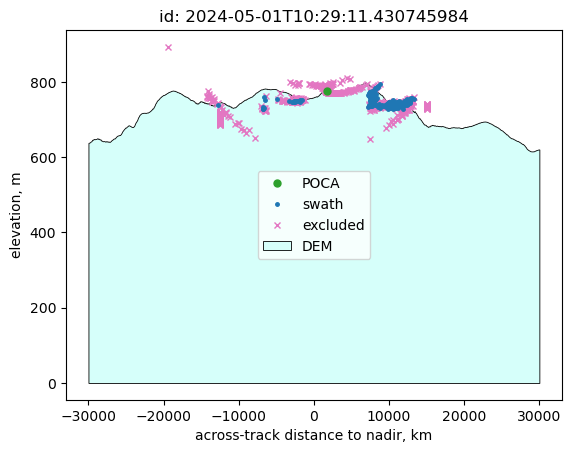

In [8]:
cryoswath.test_plots.waveform.dem_transect(l1b_data.isel(time_20_ku=[200]))

You could go ahead and inspect the coherence and power waveforms.

<Axes: title={'center': 'id: 2024-05-01T10:29:11.430745984'}, xlabel='sample number (ns_20_ku)', ylabel='coherence'>

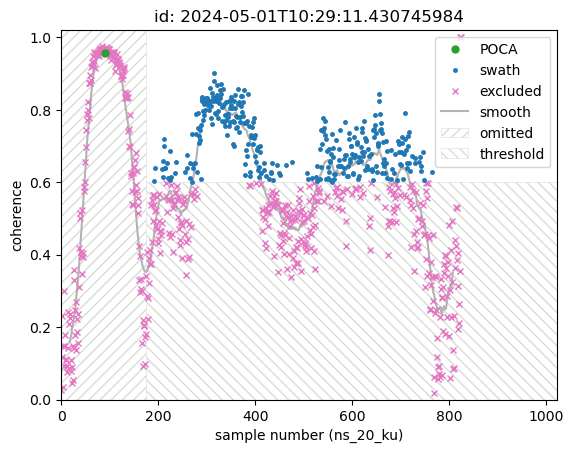

In [9]:
cryoswath.test_plots.waveform.coherence(l1b_data.isel(time_20_ku=[200]))

/home/jan/Software/miniforge3/envs/cryoswath/lib/python3.12/site-packages/xarray/core/computation.py:831: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


<Axes: title={'center': 'id: 2024-05-01T10:29:11.430745984'}, xlabel='sample number (ns_20_ku)', ylabel='power, decibel'>

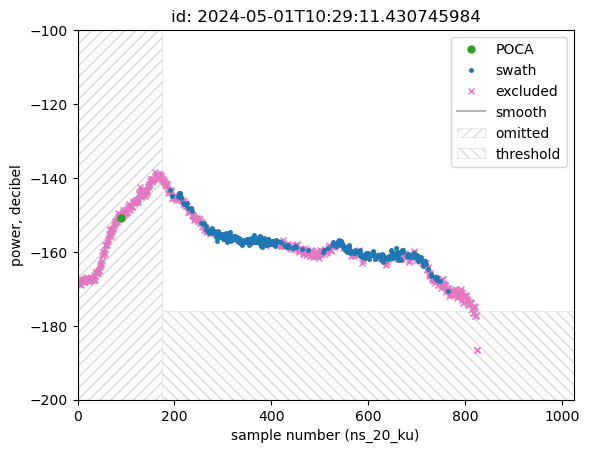

In [10]:
cryoswath.test_plots.waveform.power(l1b_data.isel(time_20_ku=[200]))

With this, you now know how to view the data on a per-waveform basis.
Should you encounter elevation estimates that are hard to comprehend,
use this to search for potential issues.